In [10]:
from pathlib import Path

from gtp.notebook_utils import setup_notebook

setup_notebook(
    device=1,
    tmp_dir=Path("/home/carlyn.1/tmp"),
    hf_cache_dir=Path("/local/scratch/carlyn.1/hf_cache"),
)

In [11]:
from gtp.models.image_encoders import BIOCLIP_2

bioclip = BIOCLIP_2().cuda()
bioclip.eval()

BIOCLIP_2(
  (image_encoder): CLIP(
    (visual): VisionTransformer(
      (conv1): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
      (patch_dropout): Identity()
      (ln_pre): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (transformer): Transformer(
        (resblocks): ModuleList(
          (0-23): 24 x ResidualAttentionBlock(
            (ln_1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (attn): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLinear(in_features=1024, out_features=1024, bias=True)
            )
            (ls_1): Identity()
            (ln_2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (mlp): Sequential(
              (c_fc): Linear(in_features=1024, out_features=4096, bias=True)
              (gelu): GELU(approximate='none')
              (c_proj): Linear(in_features=4096, out_features=1024, bias=True)
            )
            (ls_2): Identity()
          

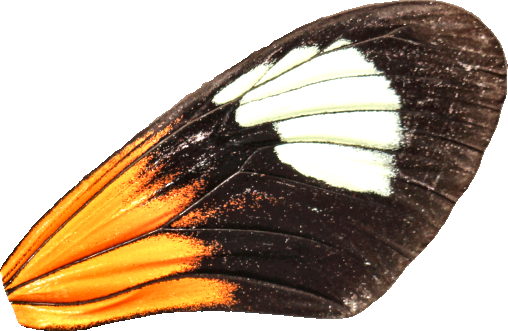

In [3]:
from PIL import Image

image = Image.open("../data/CAM016019.png").convert("RGB")
image

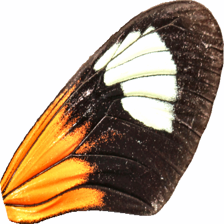

In [4]:
import torchvision.transforms as T
import torchvision.transforms.functional as F

processed_image = bioclip.preprocess(image)

mean = bioclip.image_processor.transforms[-1].mean
std = bioclip.image_processor.transforms[-1].std

new_mean = [-m/s for m, s in zip(mean, std)]
new_std = [1/s for s in std]

processed_image = F.normalize(processed_image, mean=new_mean, std=new_std)
processed_image = F.to_pil_image(processed_image)
processed_image

In [12]:
from gtp.dataloading.datasets import JigginsSegmentedWings

dataset = JigginsSegmentedWings(
    root=Path("/local/scratch/datasets/jiggins_segmented/erato/forewings"),
    transform=bioclip.preprocess,
)

In [6]:
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm

dataloader = DataLoader(
    dataset,
    batch_size=4,
    shuffle=False,
    num_workers=4,
)

extracted_features = []
for batch in tqdm(dataloader, desc="Extracting features"):
    image_embeds = bioclip(batch.cpu())
    extracted_features.append(image_embeds.cpu())
    
extracted_features = torch.cat(extracted_features, dim=0)
print(extracted_features.shape)

Extracting features:   0%|          | 0/119 [00:00<?, ?it/s]

Extracting features: 100%|██████████| 119/119 [20:40<00:00,  8.03s/it]Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/carlyn.1/miniconda3/envs/gtp/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/carlyn.1/miniconda3/envs/gtp/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/carlyn.1/miniconda3/envs/gtp/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/carlyn.1/miniconda3/envs/gtp/lib/python3.10/multiprocessing/util.py", line 300, in _run_finalizers
    finalizer()
  File "/home/carlyn.1/miniconda3/envs/gtp/lib/python3.10/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/home/carlyn.1/miniconda3/envs/gtp/lib/python3.10/multiprocessing/util.py", line 224, in __call__
    res 

torch.Size([473, 768])


In [7]:
import numpy as np

np.save("extracted_features.npy", extracted_features.detach().numpy())
print("Features saved to extracted_features.npy")

Features saved to extracted_features.npy


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

extracted_features = np.load("extracted_features.npy")
normalized_features = StandardScaler().fit_transform(extracted_features)

pca = PCA()
pca_values = pca.fit_transform(normalized_features)


In [5]:
pca.explained_variance_ratio_

array([1.63561076e-01, 9.14514437e-02, 8.72495323e-02, 6.35261983e-02,
       5.48537895e-02, 4.44009043e-02, 3.72842327e-02, 3.11599374e-02,
       2.78668981e-02, 2.28303969e-02, 2.12207939e-02, 1.85059998e-02,
       1.48258330e-02, 1.41511103e-02, 1.30230337e-02, 1.22836316e-02,
       1.08603658e-02, 9.97228175e-03, 9.29909851e-03, 8.34088679e-03,
       7.85432849e-03, 7.57187186e-03, 7.13130692e-03, 6.84328424e-03,
       6.28333678e-03, 5.82044339e-03, 5.70319034e-03, 5.54367481e-03,
       5.23077836e-03, 4.89866175e-03, 4.85004298e-03, 4.53308132e-03,
       4.48188512e-03, 4.33661230e-03, 4.11887001e-03, 4.00582235e-03,
       3.70923453e-03, 3.59090511e-03, 3.56645742e-03, 3.33182840e-03,
       3.31055978e-03, 3.14679788e-03, 3.03028733e-03, 2.91141286e-03,
       2.74431403e-03, 2.60410132e-03, 2.55559036e-03, 2.51492299e-03,
       2.44375458e-03, 2.37998459e-03, 2.32619047e-03, 2.30819522e-03,
       2.25685351e-03, 2.10976764e-03, 2.07019085e-03, 2.02088594e-03,
      

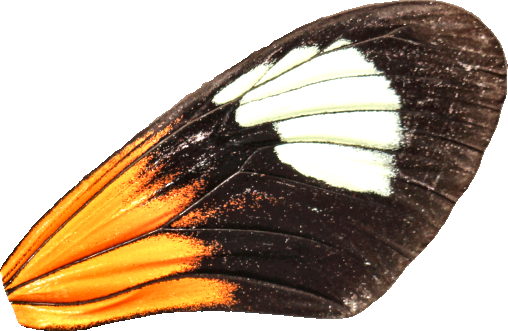

In [7]:
from PIL import Image

image = Image.open("../data/CAM016019.png").convert("RGB")
image

Ploting PCA image: 0it [00:00, ?it/s]

Ploting PCA image: 473it [00:01, 261.85it/s]


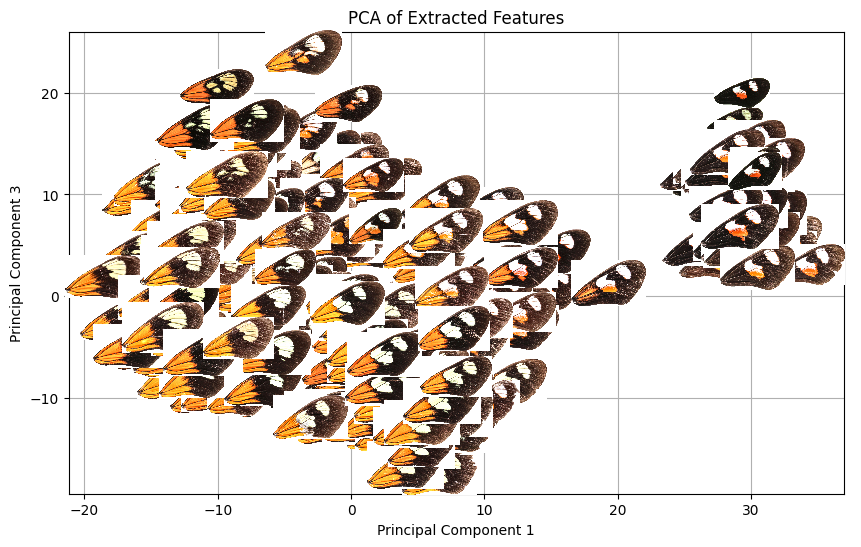

In [17]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from tqdm import tqdm

pca_x = 0
pca_y = 2

plt.figure(figsize=(10, 6))
plt.plot(pca_values[:, pca_x], pca_values[:, pca_y], 'o', markersize=2, alpha=0.5)
plt.title("PCA of Extracted Features")
plt.xlabel(f"Principal Component {pca_x + 1}")
plt.ylabel(f"Principal Component {pca_y + 1}")
plt.grid()

for i, path in tqdm(enumerate(dataset.image_paths), "Ploting PCA image"):
    image = Image.open(path)
    imagebox = OffsetImage(image, zoom=0.1)
    ab = AnnotationBbox(imagebox, (pca_values[i, pca_x], pca_values[i, pca_y]),
                    frameon=False, pad=0.5)
    plt.gca().add_artist(ab)



plt.show()

In [26]:
import pandas as pd

cam_ids = [f"{path.stem}_d" for path in dataset.image_paths]

data = np.concatenate((np.array(cam_ids).reshape(-1, 1), pca_values), axis=1)
new_df = pd.DataFrame(data, columns=["CAMID"] + [f"PC{i+1}" for i in range(pca_values.shape[1])])
new_df.head()

,CAMID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC464,PC465,PC466,PC467,PC468,PC469,PC470,PC471,PC472,PC473
0,CAM016208_d,-8.400136,-11.94456,-8.356295,7.4958835,-2.0638025,-5.7782454,6.054787,-1.1562005,3.0986164,...,0.0036048943,0.05510819,0.046954934,0.016158083,-0.036199417,0.007891707,-0.018927284,-0.004341306,0.038927153,-2.6706684e-06
1,CAM016648_d,6.0691085,9.564878,7.061248,-5.7866297,2.049564,8.503593,7.4604206,-2.7585392,2.9949129,...,0.030902905,0.01649241,-0.034689203,0.007855334,0.039526742,0.0026971225,0.034147907,0.012064634,-0.0048691467,-2.6706502e-06
2,CAM016866_d,5.0735335,3.241369,-6.284338,-0.3078553,-9.809408,0.5498379,-10.505442,-5.210758,-0.8011482,...,0.0019366671,-0.067253806,0.022314671,0.05289091,-0.025001112,0.056270894,-0.014725925,0.0009117569,-0.014473487,-2.6706382e-06
3,CAM016021_d,7.077948,-7.1680317,-12.175653,-7.6327024,8.057429,2.987842,4.5992823,3.1661413,-4.909684,...,0.033336256,0.011481794,0.035889506,0.009844929,-0.012607444,0.039898444,-0.015400682,-0.012529328,-0.013076396,-2.6706216e-06
4,CAM017133_d,-11.621748,-11.539386,-7.328769,7.0177836,0.4728561,0.61975867,0.98672014,-5.504823,-1.0562623,...,-0.005251747,-0.026168313,0.038410023,-0.019849962,0.0019114634,-0.007799859,0.03810373,0.022725804,-0.04856435,-2.6706339e-06


In [27]:
filename = "PCA_bioclip_loadings.csv"
new_df.to_csv(f"/local/scratch/carlyn.1/dna/colors/erato_forewings_PCA/{filename}", index=False)

In [18]:
import pandas as pd

df = pd.read_csv("/local/scratch/carlyn.1/dna/colors/erato_forewings_PCA/PCA_color_1_loadings.csv")
df.head()

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC471,PC472,PC473,PC474,PC475,PC476,PC477,PC478,PC479,PC480
0,CAM016019_d,-49.652735,26.011912,-5.648546,1.761695,-18.825114,18.545350,-4.060135,7.981897,-11.630800,...,0.281694,-2.517557,0.471343,-0.966010,0.518198,-0.886081,-0.478352,1.019733,-0.042493,-2.573245e-14
1,CAM016020_d,-16.930555,16.616847,2.692241,12.040084,-19.924856,3.240676,-2.314513,-16.903935,25.908572,...,0.367014,0.193835,-0.340640,-0.459934,-0.030614,0.418748,0.038679,0.146402,-0.175051,4.933987e-15
2,CAM016021_d,44.048339,19.616520,3.145320,-1.209575,-5.469540,0.408125,6.435731,2.382090,-1.641245,...,0.108804,3.161913,-0.543742,-0.398675,-1.696984,-1.200229,1.731477,1.198753,0.627153,4.640656e-15
3,CAM016022_d,35.109403,16.503006,13.005897,4.872958,10.130509,-4.145126,8.447940,0.212080,6.319037,...,-2.013061,-2.315710,1.161150,-0.788727,-1.743653,1.281779,-0.899837,-0.187736,0.541461,-5.311290e-15
4,CAM016023_d,-30.925468,-0.562919,-4.721019,-12.266425,-13.294283,-26.257164,-6.392913,-12.228701,-6.325207,...,-1.216417,-0.461157,1.061415,0.237185,1.413762,1.009515,0.291262,0.217223,-0.154285,-2.779894e-16
